In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [2]:
df = pd.read_csv('Data.csv')

df2 = df[pd.notna(df['Category'])]
df2 = df2[pd.notna(df2['Crop'])]
df2 = df2[pd.notna(df2['Query Type'])]

df = df2
df = df.reset_index(drop=True)

In [3]:
df.to_csv('Clean_data.csv',index=False)

In [4]:
states =set(df['State'])
districts = set(df['District'])
sectors = set(df['Sector'])
categories = set(df['Category'])
crops = set(df['Crop'])
query_types = set(df['Query Type'])
queries = set(df['Query'])

In [5]:
print('Number of states and union territories analyzed: ', len(states))
print('Number of districts analyzed: ', len(districts))
print('Number of sectors analyzed: ', len(sectors))
print('Number of categories analyzed: ', len(categories))
print('Number of crops analyzed: ', len(crops))
print('Number of query_types analyzed: ', len(query_types))
print('Number of unique queries analyzed: ', len(queries))

Number of states and union territories analyzed:  36
Number of districts analyzed:  686
Number of sectors analyzed:  4
Number of categories analyzed:  21
Number of crops analyzed:  297
Number of query_types analyzed:  64
Number of unique queries analyzed:  1141000


In [6]:
# Creating Dataset wil all unique queries
query_dict = {}
for key in queries:
    query_dict[key]=0
df['Unique']=0

for i in tqdm(range(len(df))):
    if query_dict[df['Query'][i]]==0:
        query_dict[df['Query'][i]]=1
        df['Unique'][i]=1
        
df = df[df['Unique']==1]
df.to_csv('Trimmed_data.csv',index=False)

  0%|                                                                                      | 0/5768093 [00:00<?, ?it/s]D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
  0%|                                                                        | 1218/5768093 [00:04<5:40:07, 282.59it/s]


KeyboardInterrupt: 

In [20]:
df = pd.read_csv('Trimmed_data.csv')
df = df.drop(columns=['Unique'])
df['Corrected Query Type'] = df['Query Type']
df['Corrected Sector'] = df['Sector']
df['Predicted Query Type'] = 0
df['Predicted Sector'] = 0
df.to_csv('Final_Trimmed_data.csv',index=False)

In [2]:
df = pd.read_csv('Final_Trimmed_data.csv')
df = df.sort_values(by='Query Type', na_position='first', kind = 'mergesort')a

In [102]:
def calculator(df):
#     print(df.head())
    current_set = set(df)
    dictionary = {}
    for ele in current_set:
        dictionary[ele]=0
    for ele in df:
        dictionary[ele]+=1
    return dictionary

states_dict = calculator(df['State'])
districts_dict = calculator(df['District'])
sectors_dict = calculator(df['Sector'])
categories_dict = calculator(df['Category'])
crops_dict = calculator(df['Crop'])
querytypes_dict = calculator(df['Query Type'])    

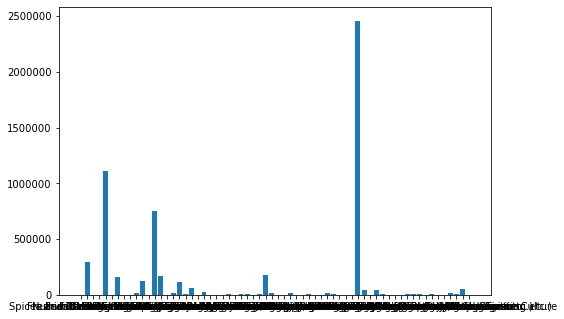

In [106]:
def bar_plotting(dictionary):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    x = []
    y = []
    for key in dictionary.keys():
        x.append(key)
        y.append(dictionary[key])
    ax.bar(x,y)
    plt.show()
            
bar_plotting(querytypes_dict)